In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error,make_scorer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from numpy import sort
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler



x_train = pd.read_csv('X_train_NHkHMNU.csv')
y_train = pd.read_csv('y_train_ZAN5mwg.csv')
x_test =  pd.read_csv('X_test_final.csv')

pd.set_option('display.max_columns', None)
from sklearn.impute import KNNImputer

In [37]:
def preprocessing(dataset):

    dataset = pd.get_dummies(dataset, columns=['COUNTRY'])
    placeholder_value = -9999
    dataset_filled = dataset.fillna(placeholder_value)
    columns_to_impute = dataset_filled.columns
    imputer = KNNImputer(n_neighbors=5)
    dataset_filled.replace(placeholder_value, float('nan'), inplace=True)
    return pd.DataFrame(imputer.fit_transform(dataset_filled), columns=columns_to_impute)

x_train_imputed = preprocessing(x_train)
x_test_imputed = preprocessing(x_test)


x_train_imputed


,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,COUNTRY_DE,COUNTRY_FR
0,1054.0,206.0,0.210099,-0.427458,-0.606523,0.606523,0.789557,0.692860,-0.789557,-0.692860,0.441238,-0.213766,0.740627,0.288782,2.209047,0.207838,0.709614,-0.190463,0.101766,1.248911,-0.573370,-0.269460,0.870344,0.626666,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.0,1.0
1,2049.0,501.0,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,1.130838,0.174773,0.426940,-0.170392,-0.762153,0.187964,-0.807112,-1.882740,-2.185961,1.987428,3.237380,-0.035514,-0.107350,-0.194308,-0.395469,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,0.0,1.0
2,1924.0,687.0,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,1.682587,2.351913,2.122241,1.572267,0.777053,-0.108578,0.779142,-1.897109,0.735137,-1.115583,-0.371039,-0.298755,-0.141239,0.428272,1.336625,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,0.0,1.0
3,297.0,720.0,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,-0.563230,0.487818,0.194659,-1.473817,-0.786025,-0.368417,1.320483,-0.205547,-1.589554,1.751523,0.562944,-0.010090,0.366885,-2.330557,-1.191889,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,1.0,0.0
4,1101.0,818.0,0.143807,-0.617038,-0.924990,0.924990,0.471847,0.990324,-0.471847,-0.990324,0.238693,-0.240862,1.003734,-0.274975,-0.230179,-0.795983,-0.005581,0.176935,0.693543,0.723587,-0.774941,-0.564498,0.691040,0.571613,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459.0,809.0,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,-1.450426,1.810665,1.388269,0.359723,-0.294001,-0.470809,1.708814,0.207266,0.712492,-1.325306,-0.855249,-0.057214,2.968535,0.790548,1.547782,0.509514,-0.077656,0.890049,0.260822,0.520315,-0.460030,-0.238427,0.876984,0.819520,1.320373,1.0,0.0
1490,1674.0,887.0,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,0.152146,1.972779,1.558300,0.561356,0.230746,-0.341147,2.957114,0.217922,0.926279,-1.222781,-0.923261,0.198857,0.789618,0.917482,1.358927,1.666252,-0.142641,0.539836,0.509007,0.838269,-1.079079,-1.071237,0.932633,-0.085690,0.356356,0.0,1.0
1491,748.0,1083.0,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,0.829568,2.108764,1.866399,1.072553,-0.180117,0.037892,0.277630,-1.833866,-0.964588,-0.626731,0.196789,-0.981718,0.303324,0.211422,1.493870,0.358120,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152,1.0,0.0
1492,1454.0,1133.0,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,-1.210230,-0.003973,0.869742,-0.436935,-0.772801,-0.288150,1.447245,0.107706,-0.196405,0.619473,0.918251,0.378080,-0.973969,-0.828580,-0.137667,-0.184862,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812,0.0,1.0


In [38]:
x_train_imputed['DE_GAS_COAL_INTERACTION'] = x_train_imputed['DE_GAS'] * x_train_imputed['DE_COAL']
x_train_imputed['DE_NET_EXPORT_cumsum'] = x_train_imputed.groupby('DAY_ID')['DE_NET_EXPORT'].cumsum()
x_train_imputed['FR_NET_EXPORT_cumsum'] = x_train_imputed.groupby('DAY_ID')['FR_NET_EXPORT'].cumsum()
x_train_imputed['FR_CONSUMPTION_cumsum'] = x_train_imputed.groupby('DAY_ID')['FR_CONSUMPTION'].cumsum()
x_train_imputed['DE_CONSUMPTION_cumsum'] = x_train_imputed.groupby('DAY_ID')['DE_CONSUMPTION'].cumsum()
x_test_imputed['GAS_COAL_INTERACTION'] = x_test_imputed['DE_GAS'] * x_test_imputed['DE_COAL']

In [39]:
x_train_imputed.sort_values(by = 'DAY_ID', inplace = True)

In [40]:
x_train_imputed.head()

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,COUNTRY_DE,COUNTRY_FR,DE_GAS_COAL_INTERACTION,DE_NET_EXPORT_cumsum,FR_NET_EXPORT_cumsum,FR_CONSUMPTION_cumsum,DE_CONSUMPTION_cumsum
742,1057.0,0.0,0.048418,-0.465067,-0.079296,0.079296,1.097725,0.650577,-1.097725,-0.650577,0.592572,-0.261565,0.534535,0.095197,1.312903,0.677089,0.470981,-0.357168,1.336885,1.185155,-0.726830,-0.874690,1.018472,0.261776,-0.344706,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003,0.0,1.0,0.316750,1.097725,0.650577,-0.465067,0.048418
1211,1179.0,1.0,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,-0.778627,1.111008,1.991028,0.660390,-0.786509,-0.681081,0.709616,0.830659,1.381575,0.136060,0.485975,-0.360309,-0.172140,1.090374,0.935387,1.214288,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,0.0,1.0,0.733698,0.405549,0.778627,1.222131,0.966997
1408,1327.0,2.0,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,1.228079,0.458302,-0.247704,-0.766904,1.785758,-0.930172,0.064726,-0.379230,-0.187892,1.032412,-0.421844,-0.844350,-0.471366,0.398812,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0.0,1.0,-0.304200,-1.080403,0.256736,-0.667390,-0.068972
1468,111.0,2.0,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,1.228079,0.458302,-0.247704,-0.766904,1.785758,-0.930172,0.064726,-0.379230,-0.187892,1.032412,-0.421844,-0.844350,-0.471366,0.398812,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,1.0,0.0,-0.304200,-2.160807,0.513472,-1.334780,-0.137944
329,2016.0,3.0,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,0.612133,1.588542,0.069297,-0.635452,-0.718729,1.994144,-0.383690,-2.002323,-1.579208,1.527633,2.986527,-1.142488,-0.718643,-0.169336,0.275487,-0.856321,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.0,1.0,-1.009441,-1.881881,-0.612133,-0.834564,-0.134670


In [41]:
y_train

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733
...,...,...
1489,459,-0.172597
1490,1674,-0.063546
1491,748,0.151797
1492,1454,-0.640917


In [42]:
X_plot = x_train_imputed[:100]

In [43]:
#Linearize the relationship of eolienne production relative to wind
x_train_imputed['FR_WIND_SQR'] = x_train_imputed['FR_WIND'] **(1/2)
x_train_imputed['DE_WIND_SQR'] = x_train_imputed['DE_WIND'] **(1/2)

x_train_imputed['FR_RAIN_CUBE'] = x_train_imputed['FR_RAIN']**(1/6)
x_train_imputed['DE_RAIN_CUBE'] = x_train_imputed['DE_RAIN']**(1/6)

x_train_imputed['FR_NON_RENEW_CONSUMPTION'] = x_train_imputed['FR_RESIDUAL_LOAD']/x_train_imputed['FR_CONSUMPTION']
x_train_imputed['DE_NON_RENEW_CONSUMPTION'] = x_train_imputed['DE_RESIDUAL_LOAD']/x_train_imputed['DE_CONSUMPTION']

x_train_imputed['FR_PERC_ELEC_TO_DE'] = x_train_imputed['FR_DE_EXCHANGE']/x_train_imputed['FR_NET_EXPORT']
x_train_imputed['DE_PERC_ELEC_TO_FR'] = x_train_imputed['DE_FR_EXCHANGE']/x_train_imputed['DE_NET_EXPORT']

x_train_imputed['FR_NON_RENEWABLE'] = x_train_imputed['FR_COAL']+ x_train_imputed['FR_GAS'] + x_train_imputed['FR_NUCLEAR']
x_train_imputed['FR_RENEWABLE'] = x_train_imputed['FR_HYDRO']+ x_train_imputed['FR_SOLAR'] + x_train_imputed['FR_WINDPOW']

x_train_imputed['DE_NON_RENEWABLE'] = x_train_imputed['FR_COAL']+ x_train_imputed['FR_GAS'] + x_train_imputed['FR_NUCLEAR'] + x_train_imputed['DE_LIGNITE']
x_train_imputed['DE_RENEWABLE'] = x_train_imputed['FR_HYDRO']+ x_train_imputed['FR_SOLAR'] + x_train_imputed['FR_WINDPOW']




In [44]:
x_train_imputed.head()

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,COUNTRY_DE,COUNTRY_FR,DE_GAS_COAL_INTERACTION,DE_NET_EXPORT_cumsum,FR_NET_EXPORT_cumsum,FR_CONSUMPTION_cumsum,DE_CONSUMPTION_cumsum,FR_WIND_SQR,DE_WIND_SQR,FR_RAIN_CUBE,DE_RAIN_CUBE,FR_NON_RENEW_CONSUMPTION,DE_NON_RENEW_CONSUMPTION,FR_PERC_ELEC_TO_DE,DE_PERC_ELEC_TO_FR,FR_NON_RENEWABLE,FR_RENEWABLE,DE_NON_RENEWABLE,DE_RENEWABLE
742,1057.0,0.0,0.048418,-0.465067,-0.079296,0.079296,1.097725,0.650577,-1.097725,-0.650577,0.592572,-0.261565,0.534535,0.095197,1.312903,0.677089,0.470981,-0.357168,1.336885,1.185155,-0.726830,-0.874690,1.018472,0.261776,-0.344706,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003,0.0,1.0,0.316750,1.097725,0.650577,-0.465067,0.048418,NaN,NaN,NaN,NaN,0.741197,5.406576,0.121886,-0.072237,-0.523535,0.987554,0.494937,0.987554
1211,1179.0,1.0,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,-0.778627,1.111008,1.991028,0.660390,-0.786509,-0.681081,0.709616,0.830659,1.381575,0.136060,0.485975,-0.360309,-0.172140,1.090374,0.935387,1.214288,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,0.0,1.0,0.733698,0.405549,0.778627,1.222131,0.966997,NaN,NaN,NaN,NaN,0.993582,0.967311,-0.425564,0.817055,2.586095,1.023451,3.676469,1.023451
1408,1327.0,2.0,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,1.228079,0.458302,-0.247704,-0.766904,1.785758,-0.930172,0.064726,-0.379230,-0.187892,1.032412,-0.421844,-0.844350,-0.471366,0.398812,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0.0,1.0,-0.304200,-1.080403,0.256736,-0.667390,-0.068972,NaN,NaN,NaN,NaN,0.810084,-5.782223,4.292403,1.020003,-0.687832,-0.742110,-1.159198,-0.742110
1468,111.0,2.0,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,1.228079,0.458302,-0.247704,-0.766904,1.785758,-0.930172,0.064726,-0.379230,-0.187892,1.032412,-0.421844,-0.844350,-0.471366,0.398812,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,1.0,0.0,-0.304200,-2.160807,0.513472,-1.334780,-0.137944,NaN,NaN,NaN,NaN,0.810084,-5.782223,4.292403,1.020003,-0.687832,-0.742110,-1.159198,-0.742110
329,2016.0,3.0,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,0.612133,1.588542,0.069297,-0.635452,-0.718729,1.994144,-0.383690,-2.002323,-1.579208,1.527633,2.986527,-1.142488,-0.718643,-0.169336,0.275487,-0.856321,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.0,1.0,-1.009441,-1.881881,-0.612133,-0.834564,-0.134670,0.699035,0.494832,NaN,NaN,1.026070,-2.045648,-1.718117,0.558864,-2.228639,1.884194,-2.397975,1.884194


In [45]:
data_merged = pd.merge(x_train_imputed, y_train, on='ID')

# Exclude non-numeric columns from data_merged for correlation analysis
numeric_columns = data_merged.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix for numeric columns only
correlation_matrix = data_merged[numeric_columns].corr()

# Extracting correlation of features with the target variable for detailed insights
target_correlation = correlation_matrix['TARGET'].sort_values(key=abs, ascending=False)
target_correlation

TARGET                      1.000000
DE_WINDPOW                 -0.150287
DE_NET_EXPORT              -0.149348
DE_NET_IMPORT               0.149348
DE_NET_EXPORT_cumsum       -0.142318
DE_RESIDUAL_LOAD            0.132555
FR_WINDPOW                 -0.132523
DE_GAS                      0.096657
DE_HYDRO                    0.086127
FR_PERC_ELEC_TO_DE         -0.084875
DE_WIND_SQR                -0.081121
DE_WIND                    -0.077154
DE_RENEWABLE               -0.061064
FR_RENEWABLE               -0.061064
FR_HYDRO                    0.052820
DE_CONSUMPTION             -0.052565
COUNTRY_FR                 -0.048840
COUNTRY_DE                  0.048840
ID                         -0.048030
FR_WIND                    -0.047421
DE_COAL                     0.045181
FR_TEMP                    -0.044339
GAS_RET                     0.041969
FR_RAIN                    -0.041570
DE_TEMP                    -0.040451
DE_RAIN                    -0.038890
CARBON_RET                  0.038252
D

In [46]:
from sklearn.impute import KNNImputer

def preprocessing(dataset):
    # Fill null values with a placeholder value
    placeholder_value = -9999
    dataset_filled = dataset.fillna(placeholder_value)
    columns_to_impute = dataset_filled.columns

    # Replace the placeholder value with NaN
    dataset_filled.replace(placeholder_value, float('nan'), inplace=True)

    # Initialize and fit KNNImputer
    imputer = KNNImputer(n_neighbors=5)
    imputed_data = imputer.fit_transform(dataset_filled)

    return pd.DataFrame(imputed_data, columns=columns_to_impute)

data_train_imputed = preprocessing(data_merged)

In [47]:
data_train_imputed.head()

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,DE_COAL,FR_COAL,DE_HYDRO,FR_HYDRO,DE_NUCLEAR,FR_NUCLEAR,DE_SOLAR,FR_SOLAR,DE_WINDPOW,FR_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,COUNTRY_DE,COUNTRY_FR,DE_GAS_COAL_INTERACTION,DE_NET_EXPORT_cumsum,FR_NET_EXPORT_cumsum,FR_CONSUMPTION_cumsum,DE_CONSUMPTION_cumsum,FR_WIND_SQR,DE_WIND_SQR,FR_RAIN_CUBE,DE_RAIN_CUBE,FR_NON_RENEW_CONSUMPTION,DE_NON_RENEW_CONSUMPTION,FR_PERC_ELEC_TO_DE,DE_PERC_ELEC_TO_FR,FR_NON_RENEWABLE,FR_RENEWABLE,DE_NON_RENEWABLE,DE_RENEWABLE,TARGET
0,1057.0,0.0,0.048418,-0.465067,-0.079296,0.079296,1.097725,0.650577,-1.097725,-0.650577,0.592572,-0.261565,0.534535,0.095197,1.312903,0.677089,0.470981,-0.357168,1.336885,1.185155,-0.726830,-0.874690,1.018472,0.261776,-0.344706,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003,0.0,1.0,0.316750,1.097725,0.650577,-0.465067,0.048418,0.803815,0.949520,0.829755,0.926541,0.741197,5.406576,0.121886,-0.072237,-0.523535,0.987554,0.494937,0.987554,0.108953
1,1179.0,1.0,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,-0.778627,1.111008,1.991028,0.660390,-0.786509,-0.681081,0.709616,0.830659,1.381575,0.136060,0.485975,-0.360309,-0.172140,1.090374,0.935387,1.214288,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,0.0,1.0,0.733698,0.405549,0.778627,1.222131,0.966997,0.686160,0.540636,0.796426,0.937851,0.993582,0.967311,-0.425564,0.817055,2.586095,1.023451,3.676469,1.023451,-0.063369
2,1327.0,2.0,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,1.228079,0.458302,-0.247704,-0.766904,1.785758,-0.930172,0.064726,-0.379230,-0.187892,1.032412,-0.421844,-0.844350,-0.471366,0.398812,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0.0,1.0,-0.304200,-1.080403,0.256736,-0.667390,-0.068972,0.482855,0.570350,0.792139,1.050423,0.810084,-5.782223,4.292403,1.020003,-0.687832,-0.742110,-1.159198,-0.742110,2.575976
3,111.0,2.0,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,-0.256736,1.228079,0.458302,-0.247704,-0.766904,1.785758,-0.930172,0.064726,-0.379230,-0.187892,1.032412,-0.421844,-0.844350,-0.471366,0.398812,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,1.0,0.0,-0.304200,-2.160807,0.513472,-1.334780,-0.137944,0.482855,0.403356,0.792139,1.050423,0.810084,-5.782223,4.292403,1.020003,-0.687832,-0.742110,-1.159198,-0.742110,0.861270
4,2016.0,3.0,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,0.612133,1.588542,0.069297,-0.635452,-0.718729,1.994144,-0.383690,-2.002323,-1.579208,1.527633,2.986527,-1.142488,-0.718643,-0.169336,0.275487,-0.856321,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.0,1.0,-1.009441,-1.881881,-0.612133,-0.834564,-0.134670,0.699035,0.494832,0.853344,0.958828,1.026070,-2.045648,-1.718117,0.558864,-2.228639,1.884194,-2.397975,1.884194,0.068905


In [48]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

def evaluate_metrics(y_true, y_pred):
    # Calculate Mean Squared Error (MSE)
    mse = ((y_pred - y_true) ** 2).mean()

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate Spearman correlation coefficient
    spearman_corr, _ = spearmanr(y_true, y_pred)

    return mse, mae, spearman_corr

def evaluate_moving_average(y_train, y_valid, window_size):
    # Calculate the moving average on training set
    moving_avg_train = y_train.rolling(window=window_size).mean()

    # Calculate the moving average on validation set
    moving_avg_valid = y_valid.rolling(window=window_size).mean()

    # Calculate Mean Squared Error
    mse = ((moving_avg_valid - y_valid) ** 2).mean()

    # Calculate R-squared
    y_mean = y_valid.mean()
    ss_total = ((y_valid - y_mean) ** 2).sum()
    ss_res = ((moving_avg_valid - y_valid) ** 2).sum()
    r2_valid = 1 - (ss_res / ss_total)

    return mse, r2_valid

# Split the data into train and validation sets
X = x_train_imputed
y = y_train['TARGET']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the window size for moving average
window_size = 5  # You can adjust this as needed

# Evaluate the moving average model
mse, r2_valid = evaluate_moving_average(y_train, y_valid, window_size)

In [49]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import mean_absolute_error

# Calculate evaluation metrics
moving_avg_valid = y_valid.rolling(window=window_size).mean()  # Calculate moving average on validation set
mse, mae, spearman_corr = evaluate_metrics(y_valid[window_size - 1:], moving_avg_valid[window_size - 1:])

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Spearman Correlation Coefficient:", spearman_corr)


Mean Squared Error (MSE): 0.972755471761055
Mean Absolute Error (MAE): 0.5871467271921207
Spearman Correlation Coefficient: 0.3479830228014248


In [50]:
from sklearn.linear_model import LinearRegression

# Define your estimator
estimator = LinearRegression()  # Instantiate the estimator object

# Define the range of training sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)


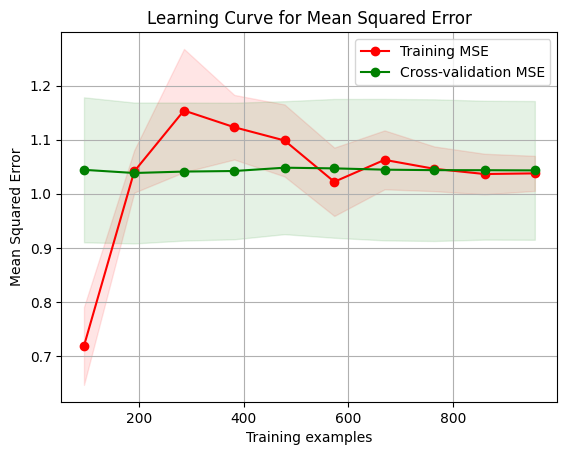

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.dummy import DummyRegressor  # Import DummyRegressor

def plot_learning_curve_mse(train_sizes, train_mse, valid_mse, title='Learning Curve (MSE)'):
    train_mse_mean = -np.mean(train_mse, axis=1)
    train_mse_std = np.std(train_mse, axis=1)
    valid_mse_mean = -np.mean(valid_mse, axis=1)
    valid_mse_std = np.std(valid_mse, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.grid()

    plt.fill_between(train_sizes, train_mse_mean - train_mse_std,
                     train_mse_mean + train_mse_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, valid_mse_mean - valid_mse_std,
                     valid_mse_mean + valid_mse_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mse_mean, 'o-', color="r",
             label="Training MSE")
    plt.plot(train_sizes, valid_mse_mean, 'o-', color="g",
             label="Cross-validation MSE")

    plt.legend(loc="best")
    return plt

# Define the range of training sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Evaluate the model with learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=DummyRegressor(),  # Use DummyRegressor as the estimator
    X=np.zeros((len(y_train), 1)),  # Dummy X for learning curve, not used
    y=y_train,  # Target variable
    train_sizes=train_sizes,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Plot the learning curve
plot_learning_curve_mse(train_sizes, train_scores, valid_scores, title='Learning Curve for Mean Squared Error')
plt.show()
